<a href="https://colab.research.google.com/github/barrafcm/projetos_data_science/blob/master/An%C3%A1lise_AirBnb_Roma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Férias em Roma: uma análise das opções de hospedagem em AirBnb na "Cidade Eterna"</h1>

*Por Felipe Caldoncelli Barra Melo*

<img src="https://media.melhoresdestinos.com.br/2019/02/passagens-aereas-roma-capa2019-01-820x430.jpg" width='120%'>

Roma é uma das cidades mais visitadas do mundo, recebendo mais de 10 milhões de turistas por ano. A capital italiana é destino obrigatório para os amantes de viagens, história ou boa gastronomia.

A cidade, considerada um museu a céu aberto, encanta viajantes do mundo inteiro pela grandiosidade e importância das construções antigas. Capital do Império Romano e sede da Igreja Católica, Roma merece realmente o título de "Cidade Eterna".

Há muita coisa a ser vista e, na maioria das vezes, pouco tempo para aproveitar tudo. Um bom local de hospedagem é fundamental para poder extrair o máximo que o destino pode oferecer. Comforto, localização e preço, quase sempre, são características prioritárias na hora de fazer sua escolha.

Para a nossa sorte, com o crescimento das plataformas digitais as opções de hospedagem se multiplicaram. Em grande parte este movimento se deve ao, já consagrado, website [Airbnb]("www.airbnb.com"). Oferecendo acomodações para todos os gostos e bolsos, a plataforma junta a disponibilidade de anfitriões alugarem seus imóveis ou quartos vazios em suas habitações com o desejo de turistas encontrarem bons locais com melhores preços que a rede hoteleira tradicional.

Este artigo visa fazer uma análise das acomodações do Airbnb em Roma, de forma a ajudar seu planejamento de viagem. O texto é dividido em **duas seções**, a **primeira** é uma **análise dos dados** abertos obtidos por meio do website [Inside Airbnb](http://insideairbnb.com/get-the-data.html), plataforma que divulga dados do Airbnb em diversas cidades do mundo. Ela é a base para mostrarmos o perfil das acomodações em Roma. 

Agora, se você não gosta de *Data Science* e gráficos, pule para a **segunda seção**. Nesta parte falo sobre como, a partir dos dados obtidos, tentar **achar as melhores acomodações**, além de trazer um pouco da experiência que minha esposa e eu tivemos durante nossa estada na cidade.

**Vamos lá ?**

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>






# **Parte 1 - Dados**

### **1.1 Obtenção dos dados**

Os dados utilizados nesta análise foram obtidos por meio do *website* [Inside Airbnb]("http://insideairbnb.com/get-the-data.html").

O arquivo utilizado nesta análise é um sumário das informações disponibilizadas, denominado *listings.csv* datado de 29 de abril de 2020.

* `listings.csv` - Summary information and metrics for listings in Rome (good for visualisations).



In [2]:
# importação de pacotes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importação do arquivo listings.csv para o DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/lazio/rome/2020-04-29/visualisations/listings.csv")

###**1.2 Análise de Dados**

Os dados obtidos por meio do arquivo são listados abaixo para sustentar o desenvolvimento das análises.

**Dicionário de Variáveis**

Os dados são apresentados para as 16 variáveis listadas abaixo:
* `id` - número de identificação da acomodação
* `name` - nome da descrição da acomodação	
* `host_id`- número de identificação do anfitrião	
* `host_name` - nome do anfitrião	
* `neighbourhood_group` - variável que não apresenta dados válidos	
* `neighbourhood` - bairro	
* `latitude` - latitude	
* `longitude` - longitude
* `room_type` - tipo de acomodação	
* `price`- preço da acomodação em Euros	
* `minimum_nights` - duração mínima da estadia	
* `number_of_reviews` - quantidade de avaliações	
* `last_review`- última atualização	
* `reviews_per_month` - número de avaliações por mês	
* `calculated_host_listings_count`- número de acomodações do mesmo anfitrião	
* `availability_365` - número de diárias em que a acomodação não foi ocupada últimos 365 dias

Amostra do Data Frame

In [0]:
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2737,"Single room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87218,12.48355,Private room,18,60,7,2015-05-28,0.11,5,365
1,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.88826,12.47002,Private room,100,1,55,2017-10-31,0.39,3,365
2,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89503,12.49163,Entire home/apt,105,2,17,2018-10-01,0.15,6,365
3,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.89574,12.49058,Entire home/apt,85,2,142,2020-01-03,1.29,1,345
4,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.92584,12.46809,Entire home/apt,95,3,39,2015-07-19,0.34,1,365


A cidade de Roma possui 31.215 acomodações listadas no Airbnb

In [0]:
# verificação dos valores na variável neighbourhood_group
df.neighbourhood_group.sum()
# Não existem valores válidos pois, (output)

0.0

In [0]:
# matriz
print(df.shape)

# número de linhas da matriz
print(df.shape[0])

# número de colunas da matriz
print(df.shape[1])

(31215, 16)
31215
16


**Volume e tipo de dados**

In [0]:
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))
print(df.dtypes)

Entradas:	31215
Variáveis:	16

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


**Valores Ausentes**

Percentual de dados ausentes por variável:

In [0]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.197437
last_review                       0.197437
name                              0.000320
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

A variável `neighbourhood_group` não possui valores válidos e pode ser desconsiderada.

As variáveis `reviews_per_month` e `last_review` possuem, ambas, 19,7% de dados ausentes. Análises específicas sobre essas duas variáveis devem levar em consideração este dado. É possível, dada a igualdade de valores e semelhança entre o tipo de dado, que os valores estejam ausentes nas mesmas entradas. Isto deve ser objeto de análise posterior, caso este dados sejam considerados importantes.

Os dados faltantes na variável `name`, em uma primeira análise, podem ser considerados insignificantes.

Não há dados faltantes nas outras variáveis.



**Distribuição das Variáveis**

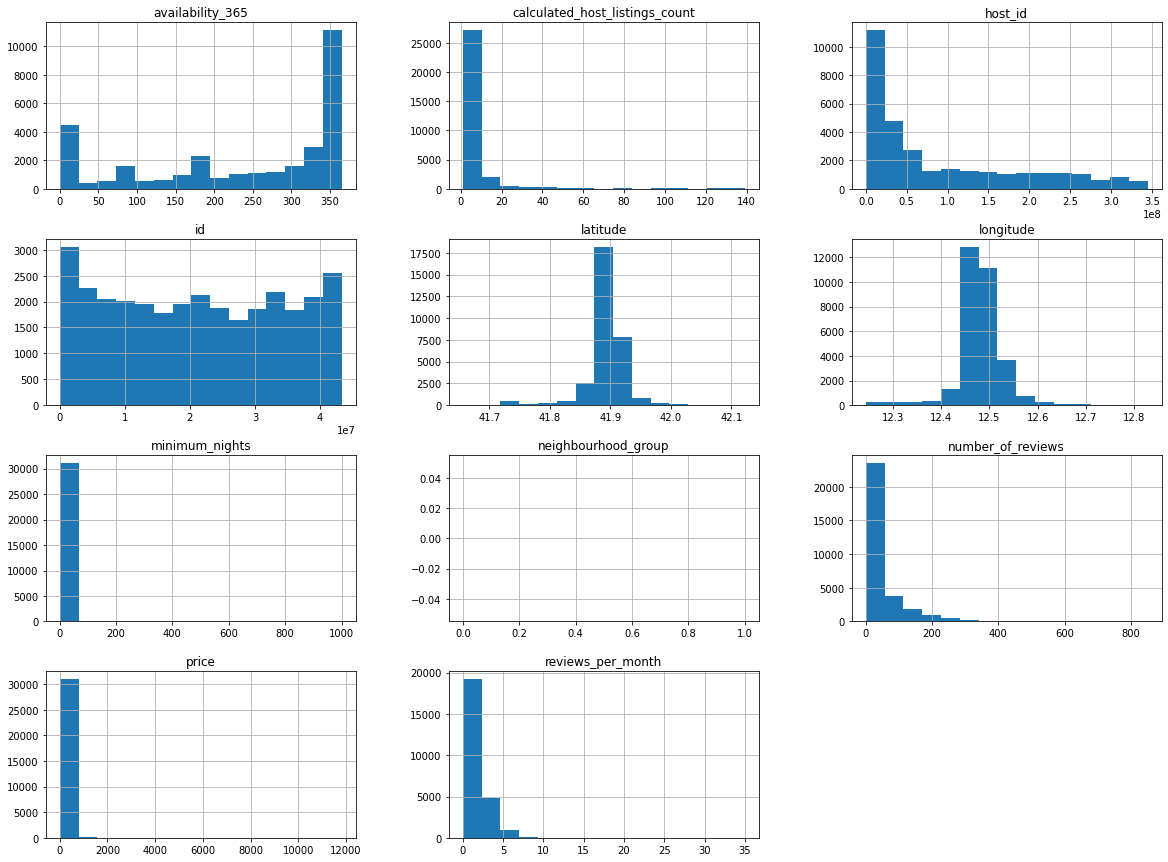

In [0]:
df.hist(bins=15, figsize=(20,15));

**Analisando Outliers**

A análise dos histogramas nos faz perceber que existe grande dispersão nas seguintes variáveis: `price`, `minimum_nigths`, `reviews_per_month`, `number_of_reviews` e `calculated_host_listings_count`.

Essas variáveis serão analisadas qualitativamente abaixo, inicialmente com o método `describe()`


In [0]:
df[['price', 'minimum_nights', 'reviews_per_month', 'number_of_reviews', 'calculated_host_listings_count']].describe()

,price,minimum_nights,reviews_per_month,number_of_reviews,calculated_host_listings_count
count,31215.000000,31215.000000,25052.000000,31215.000000,31215.000000
mean,111.487041,3.080154,1.460446,43.126862,7.181643
std,276.420392,15.307859,1.518958,70.042274,16.905015
min,3.000000,1.000000,0.010000,0.000000,1.000000
25%,50.000000,1.000000,0.280000,1.000000,1.000000
50%,75.000000,2.000000,0.930000,12.000000,2.000000
75%,115.000000,3.000000,2.220000,55.000000,6.000000
max,11818.000000,1000.000000,34.960000,850.000000,139.000000


Para efeito desta análise serão descartados registros das variáveis que não representam a realidade de uma viagem típica de turismo para Roma, a saber:

* `price` > 400 Euros (mesmo famílias grandes, dificilmente alugam imóveis acima de tal valor)
* `minimum_nights` > 15 dias (não é comum turistas passarem 15 dias apenas em Roma e imediações)
* `reviews_per_month` > 30 (considerando que os mês típico tem 30 dias, valores acima deste tendem a sugerir informações errôneas)
* `number_of_reviews` - dados não serão descartados, pois acomodações com grande número de avaliações tendem a representar anúncios consagrados pelo público da plataforma
* `calculated_host_listings_count` - dados não serão descartados, pois a quantidade de imóveis de um mesmo proprietário não apresenta influência direta aos objetivos deste estudo

**Distribuição da variáveis consideradas**




Boxplot para `price`

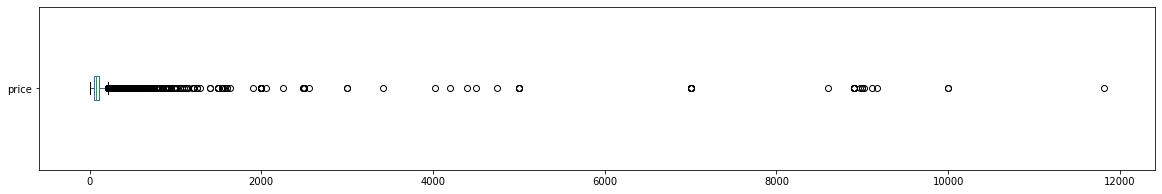

In [0]:
# boxplot para price
df.price.plot(kind='box', vert=False, figsize=(20,3));

In [0]:
# número acomodações em que: price > 400
print(len(df[df.price >400]))

661


In [0]:
# percentual de acomodações em que: price > 400
print(len(df[df.price > 400])/df.shape[0])
# obs.: não existem dados vazios para price

0.02117571680281916


Existem 661 acomodações com diárias maiores que 400 Euros. Este valor representa 2,11% do total de acomodações. Estes imóveis de mais alto valor serão desconsiderados da pesquisa por não representarem a real necessidade da maioria dos perfil de turistas.

Boxplot para `minimum_nights`

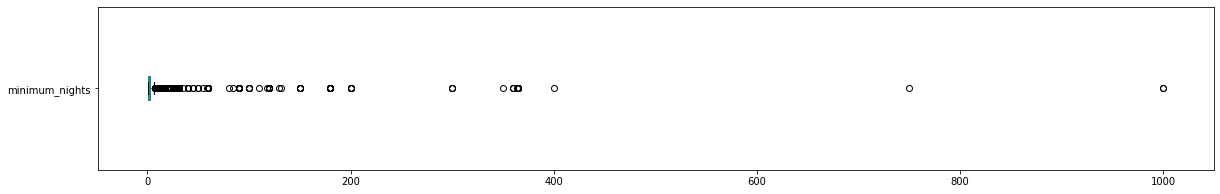

In [0]:
# boxplot para minimun_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(20,3));

In [0]:
# número de acomodações com minimum_nigths > 15
print(len(df[df.minimum_nights > 15]))

522


In [0]:
# percentual de acomodacoes com minimum_nights > 15
print(len(df[df.minimum_nights > 15])/df.shape[0])
#obs.: Não existem dados vazios para  minimum_nights

0.016722729456991832


Apenas 1,67% das acomodações exige estadia superior a 15 dias. Uma estadia superior a 15 dias em Roma não costuma a representar a realidade da maioria dos planejamentos turísticos.

Análise `reviews_per_month`

In [0]:
# número de acomodações em que: reviews_per_month > 30
print(len(df[df.reviews_per_month > 30]))

2


Apenas duas acomodações possuem mais de 30 reviews por mês. Estes valores serão desconsiderados por serem considerados errôneos.

**Eliminação de Outliers**

In [0]:
# remoção de outliers em um novo dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 400].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 15].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 30].index, axis=0, inplace=True)

# remoção de neighbourhood_group (dados vazios)
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

###**1.3 Histogramas dos Dados Tratados**

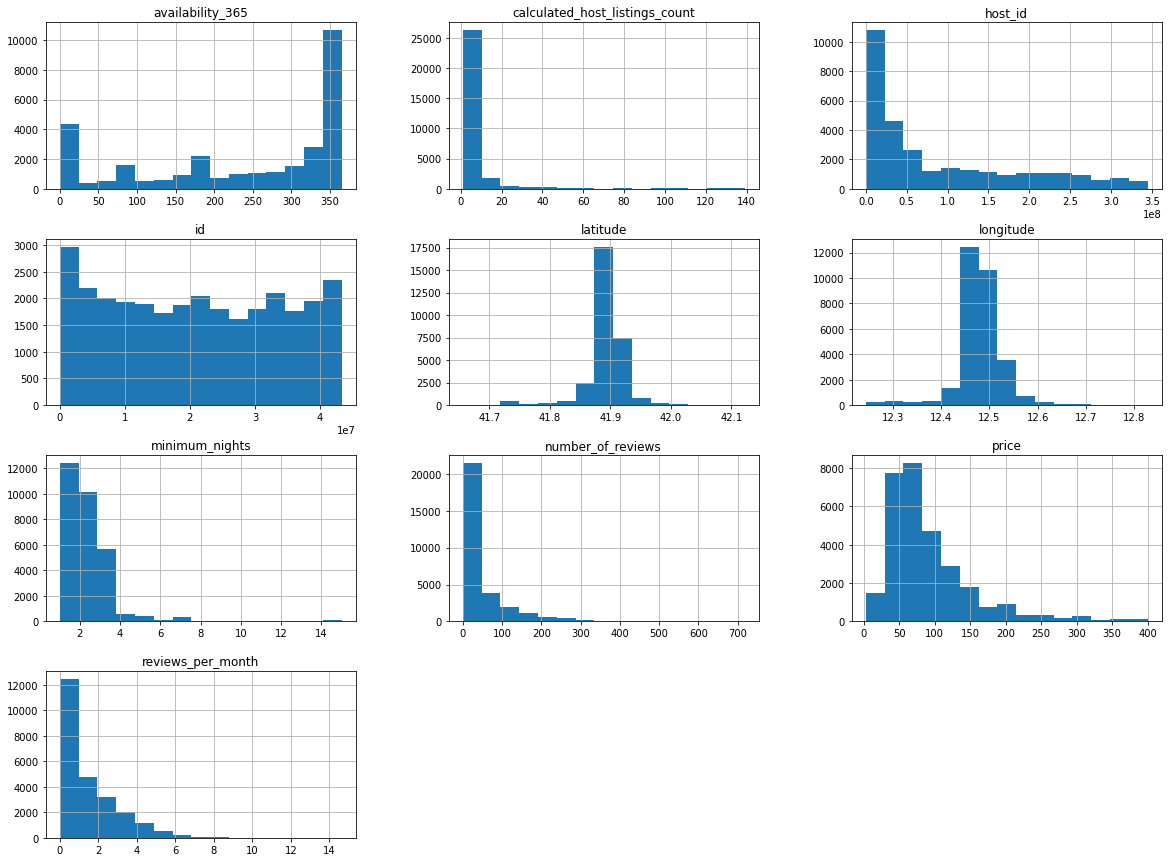

In [0]:
df_clean.hist(bins=15, figsize=(20,15));

###**1.4 Correlação entre variáveis**

Matriz de correlação

In [0]:
# matriz de correlação
corr = df_clean[[
'price',
'reviews_per_month',
'number_of_reviews',                
'last_review',                                                    
'availability_365',                                     
'minimum_nights',
'calculated_host_listings_count']].corr() 

display(corr)

,price,reviews_per_month,number_of_reviews,availability_365,minimum_nights,calculated_host_listings_count
price,1.000000,-0.051905,-0.066150,0.135590,0.033340,0.151092
reviews_per_month,-0.051905,1.000000,0.775616,0.073475,-0.085555,-0.053942
number_of_reviews,-0.066150,0.775616,1.000000,0.108122,-0.004980,-0.062486
availability_365,0.135590,0.073475,0.108122,1.000000,-0.072443,0.012405
minimum_nights,0.033340,-0.085555,-0.004980,-0.072443,1.000000,0.002719
calculated_host_listings_count,0.151092,-0.053942,-0.062486,0.012405,0.002719,1.000000


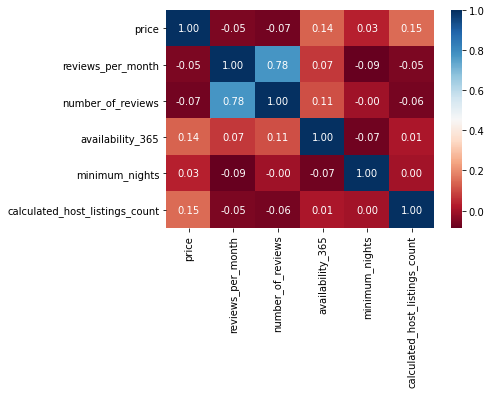

In [0]:
# heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=False, linecolor='white', annot=True);

O gráfico mostra uma correlação expressiva entre o número avaliações totais e quantidade de avaliações por mês. Essa correlação parece ter causalidade, uma vez que acomodações que recebem uma maior taxa mensal de avaliações passam a ter mais avaliações totais e vice-versa.

Não é possível verificar outras correlações fortes entre as variáveis.

###**1.5 Tipos de acomodação**



In [0]:
# contagem do tipo de acomodações
df_clean.room_type.value_counts()

Entire home/apt    19388
Private room        8998
Hotel room          1412
Shared room          238
Name: room_type, dtype: int64

In [0]:
# percentual do tipo de acomodações
df_clean.room_type.value_counts()/df.shape[0]

Entire home/apt    0.621112
Private room       0.288259
Hotel room         0.045235
Shared room        0.007625
Name: room_type, dtype: float64

###**1.6 Avaliação por "Municípios"**

Roma (Comuna de Roma) é dividida administrativamente em 15 municípios. As informações de `neighbouhood` utilizam este critério e não o dos bairros, como são mais conecidos (veja a parte 2 para detalhes).


**Valor médio por "municípios"**

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
I Centro Storico              110.472812
XIII Aurelia                   84.251755
II Parioli/Nomentano           79.913082
XV Cassia/Flaminia             78.333333
XII Monte Verde                75.481481
IX Eur                         69.747774
X Ostia/Acilia                 66.698315
VII San Giovanni/Cinecittà     66.354893
XIV Monte Mario                66.210438
VIII Appia Antica              64.878019
XI Arvalia/Portuense           62.632432
III Monte Sacro                60.222222
IV Tiburtina                   55.089474
V Prenestino/Centocelle        50.361223
VI Roma delle Torri            48.914286
Name: price, dtype: float64

**Quantidade de acomodações por município**

In [0]:
bairros_roma = ['I Centro Storico',
'XIII Aurelia',                  
'II Parioli/Nomentano',           
'XV Cassia/Flaminia',             
'XII Monte Verde',                
'IX Eur',                         
'X Ostia/Acilia',                 
'VII San Giovanni/Cinecittà',     
'XIV Monte Mario',                
'VIII Appia Antica',              
'XI Arvalia/Portuense',           
'III Monte Sacro',                
'IV Tiburtina',                   
'V Prenestino/Centocelle',        
'VI Roma delle Torri']


for bairro in bairros_roma:
    dicionario = dict(bairro=bairro, 
                      num_acomod=df_clean[df_clean.neighbourhood == bairro].shape[0],
                      percent=(df_clean[df_clean.neighbourhood == bairro].shape[0]/df_clean.shape[0])*100)
    print(f"{dicionario['bairro']} - {dicionario['num_acomod']} acomodações  -  {round(dicionario['percent'],2)}% do total")

I Centro Storico - 15816 acomodações  -  52.66% do total
XIII Aurelia - 1994 acomodações  -  6.64% do total
II Parioli/Nomentano - 2232 acomodações  -  7.43% do total
XV Cassia/Flaminia - 555 acomodações  -  1.85% do total
XII Monte Verde - 1566 acomodações  -  5.21% do total
IX Eur - 337 acomodações  -  1.12% do total
X Ostia/Acilia - 653 acomodações  -  2.17% do total
VII San Giovanni/Cinecittà - 2381 acomodações  -  7.93% do total
XIV Monte Mario - 594 acomodações  -  1.98% do total
VIII Appia Antica - 828 acomodações  -  2.76% do total
XI Arvalia/Portuense - 555 acomodações  -  1.85% do total
III Monte Sacro - 432 acomodações  -  1.44% do total
IV Tiburtina - 570 acomodações  -  1.9% do total
V Prenestino/Centocelle - 1243 acomodações  -  4.14% do total
VI Roma delle Torri - 280 acomodações  -  0.93% do total


**Distribuição geográfica das acomodações em preço**

No gráfico de dispersão abaixo é apresentada a localização das acomodações do Airbnb em Roma em função do seu preço. 

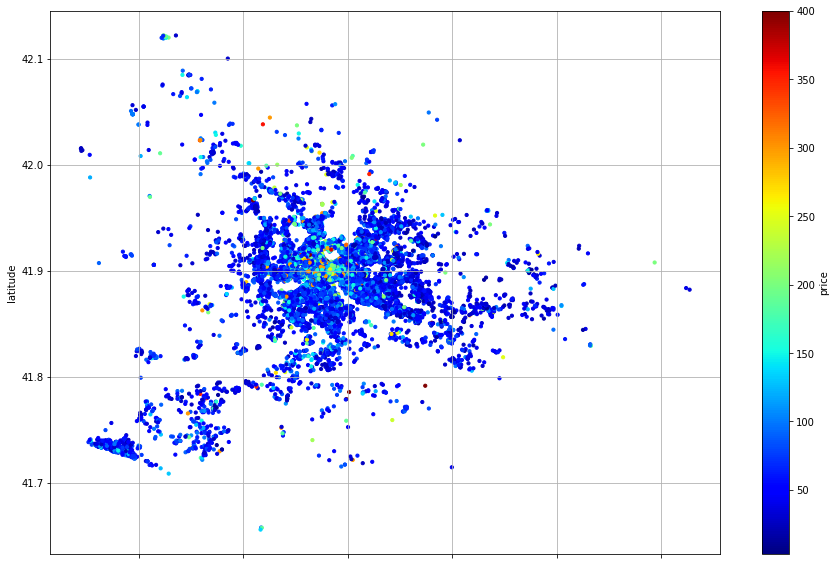

In [0]:
# plotando os imóveis por longitude e latitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=2, c='price', s=10, cmap=plt.get_cmap('jet'), figsize=(15,10), grid=True);

###**1.7 Onde estão as acomodações mais requisitadas - (número de avaliações por mês)**

Para esta avaliação foi gerado um novo DataFrame com acomodações que recebem entre 5 e 12 avaliações por mês. 

Estes valores foram escolhidos pois representam as acomodações com maior ocupação e desconsideram outliers da variável. A amostra é estatiscamente significativa pois possui 6384 acomodações.

É possível, por meio do gráfico de dispersão, observar a concentração dos imóveis mais procurados notadamente no centro histórico. Este resultado vai ao encontro da maior oferta de acomodações nesta área.  



In [0]:
# criando um dataframe para acomodações entre 5 e 12 avaliações por mês
df_reviews = df_clean.copy()

df_reviews.drop(df_reviews[df_reviews.reviews_per_month < 5].index, axis=0, inplace=True)
df_reviews.drop(df_reviews[df_reviews.reviews_per_month > 12].index, axis=0, inplace=True)

# verificando o número de acomodações neste dataframe
print(f'{df_reviews.shape[0]} acomodações.') 


6384 acomodações.


Em função do preço

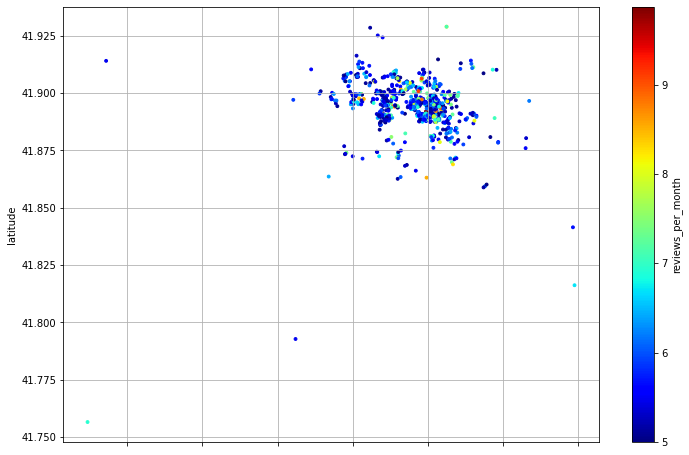

In [0]:
# gráfico de dispersão das acomodações
df_reviews.plot(kind='scatter', x='longitude', y='latitude', c='reviews_per_month', cmap=plt.get_cmap('jet'),s=8, alpha=1, figsize=(12,8), grid=True);


Foco no georreferenciamento

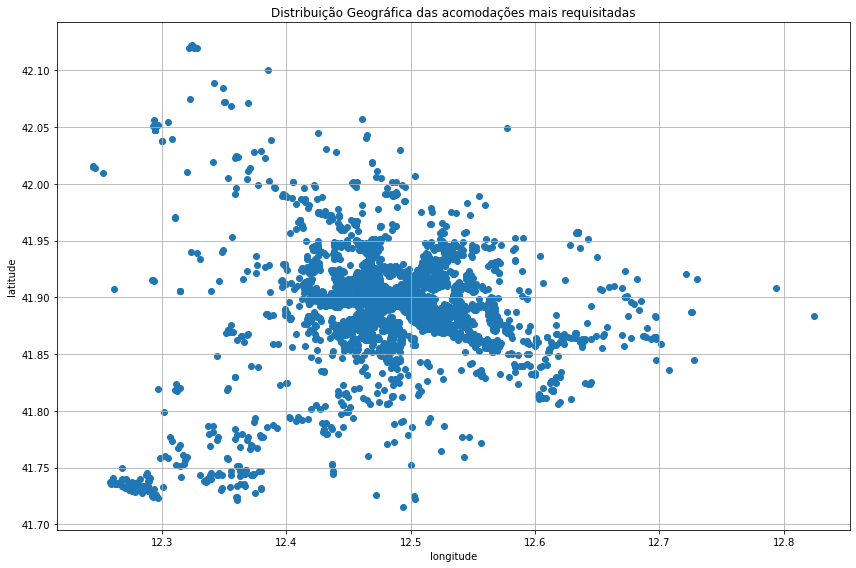

In [0]:
fig, ax=plt.subplots(figsize=(12,8))

x=df_reviews['longitude']
y=df_reviews['latitude']

ax.scatter(x, y)
ax.grid(b=True, which='major', axis='both')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title("Distribuição Geográfica das acomodações mais requisitadas")
fig.tight_layout()


###**1.8 O Centro Histórico**

O Centro Histórico de Roma é notadamente a região mais importante a ser analisada. Nesta área estão concetradas a maioria das acomodações, sendo também a região mais procurada e mais cara.

Infelizmente, o banco de dados não mostra a divisão das acomodações em função dos bairros. Entretanto, focando nossa análise no Centro é possível extrair informações importantes sobre os bairros.

Primeiramente, criamos um DataFrame específico para o Centro Histórico.

A partir dele analisamos o preço das acomodações.

Existem 15816 acomodações no I Centro Storico


,price
count,15816.000000
mean,110.472812
std,66.561548
min,3.000000
25%,65.000000
50%,90.000000
75%,135.000000
max,400.000000


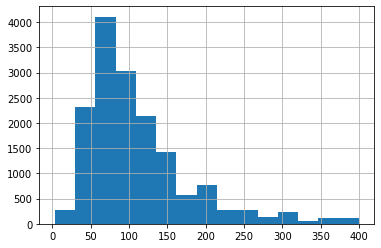

In [6]:
# criando um dataframe para centro histórico
df_clean_centro = df_clean.copy()

df_clean_centro.drop(df_clean_centro[df_clean_centro.neighbourhood != 'I Centro Storico'].index, axis=0, inplace=True)
print(f'Existem {df_clean_centro.shape[0]} acomodações no I Centro Storico')

# histograma para o preço no centro historico
df_clean_centro.price.hist(bins=15);

df_clean_centro[['price']].describe()

**Preço no Centro Histórico - Georreferenciado**

Este gráfico apresenta o preço das acomodações no Centro Histórico de forma georrerenciada. 

A partir deste gráfico, é possível identificar diferença no preço dos imóveis em cada bairro (veja a Seção 2 para detalhes).

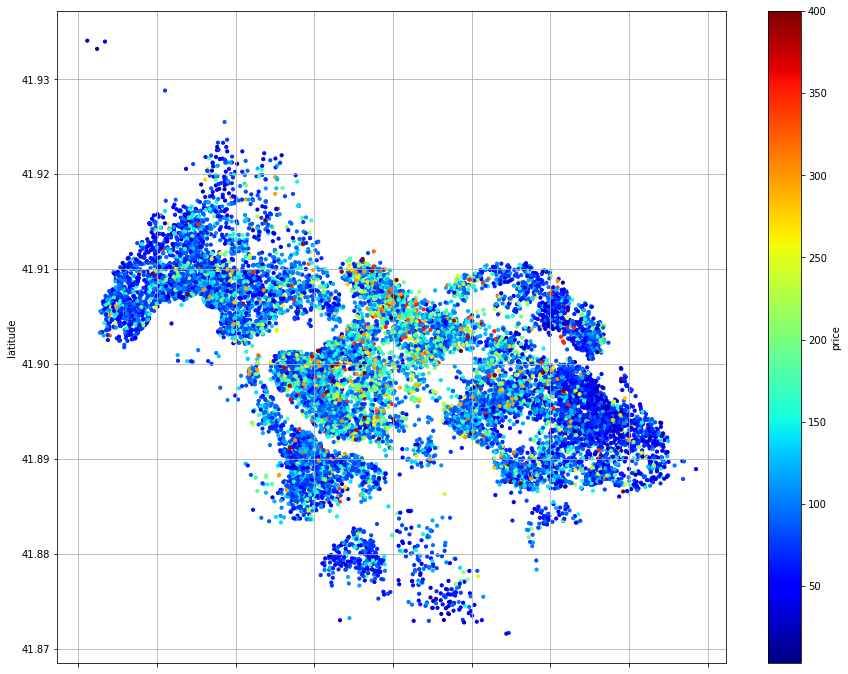

In [11]:
df_clean_centro.plot(kind='scatter', x='longitude', y='latitude', c='price', s=10, alpha=1, cmap=plt.get_cmap('jet'),figsize=(15,12), grid=True);

**Bairros com maior ocupação de turistas**

Neste gáfico georreferenciado são apresentadas as acomodações mais requisitadas (entre 5 e 12 avaliações por mês).

Por meio deste, é possível buscar o melhor custo x benefício.

3113 acomodações.


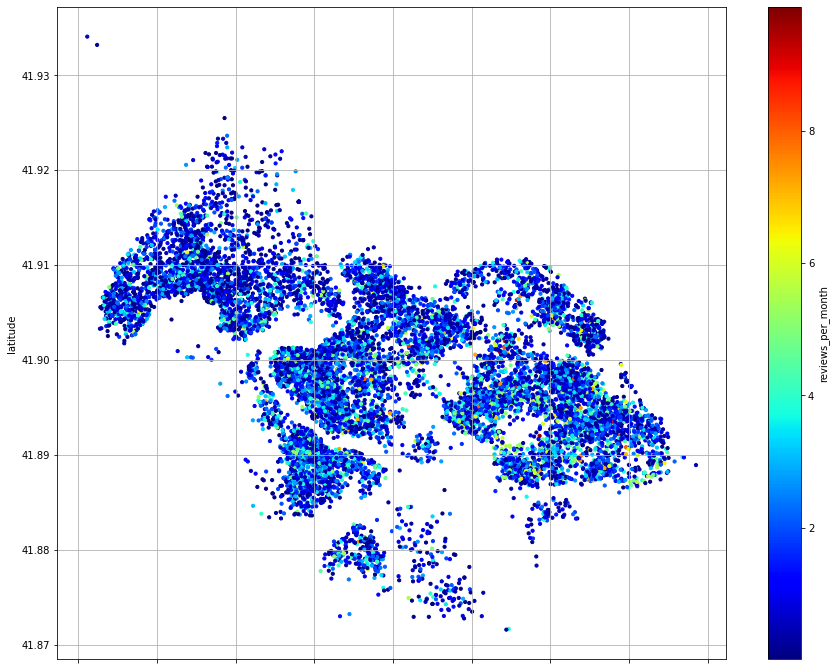

In [12]:
# criando um dataframe para acomodações entre 5 e 12 avaliações por mês
df_reviews_centro = df_clean_centro.copy()

df_reviews_centro.drop(df_reviews_centro[df_reviews_centro.reviews_per_month < 5].index, axis=0, inplace=True)
df_reviews_centro.drop(df_reviews_centro[df_reviews_centro.reviews_per_month > 12].index, axis=0, inplace=True)

# verificando o número de acomodações neste dataframe
print(f'{df_reviews_centro.shape[0]} acomodações.') 

df_clean_centro.plot(kind='scatter', x='longitude', y='latitude', c='reviews_per_month', s=10, alpha=1, cmap=plt.get_cmap('jet'), figsize=(15,12), grid=True);

#**Parte 2 - E aí ? Como é o Airbnb em Roma ?**

Se você planeja viajar para Roma, boa notícia, opções no Airbnb não faltam. Contando com mais de 30.000 acomodações, é quase certo que algo vai te agradar. Seja como mochileiro ou com família são muitas as possibilidades.

**Tipos de acomodação**

Muito embora a oferta seja grande, existem consideravelmente mais opções de acomodações inteiras. São mais de 19.000 desse tipo, contra quase 9.000 quartos inteiros (modalidade em que você ocupa um quarto na casa de alguém). Ainda é possível encontrar quartos em hotéis disponibilizados no website (mais de 1400).
A última opção, também a mais rara, são os quartos compartilhados totalizando pouco mais de 200.

**Onde se hospedar ?**

Antes de responder esta pergunta, temos que fazer algumas considerações sobre as subdivisões da Comuna de Roma. Do ponto de vista administrativo ela está dividida em 15 municípios.


<center><img alt="Municipios de Roma" width="50%" src="https://2.bp.blogspot.com/-SQJk2wIpTdI/V8OhqnYaGyI/AAAAAAAARUI/-UljdehL3vIHQdRwDO-9dGMRCMy1VeGIgCLcB/s320/nmp_mun_d0.gif"></center>


O Município I é o Centro Histórico, nele estão todas as principais atrações turísticas. Essas mesmas que você está pensando: Coliseu, Fontana di Trevi, Foro Romano, etc.
Não é à toa que nesta área está localizada a maior das acomodações do Airbnb. São quase 16.000 opções (52% do total). 

Na sequência temos os Municípios vizinhos VII (San Giovanni/Cinecittà), II(Parioli/Nomentano) e XII(Aurelia), variando de 8 a 6,5% da oferta de acomodações cada. Os demais municípios tem menor disponibilidade.

Mas a localização tem seu preço. No Centro Histórico uma acomodação custa em média 110 Euros por dia. Enquanto isto, os municípios vizinhos tem valores entre 84 e 66 Euros (para mais detalhes veja a seção 1.6)

Então ficar no Centro Histórico é muito melhor que nos outros municípios ? Bem, isto depende. O Município II, por exemplo, é vizinho à Villa Borghese e à Piazza del Popolo, paradas obrigatórias em uma viagem à capital italiana. E já que você vai passar por lá indo ou voltando da, também imperdível, Piazza di Spagna, aproveite para comer o melhor Tiramisú do mundo no [Pompi](https://barpompi.it/). Se é realmente o melhor do mundo eu não sei, mas que é muito bom, isto é. 

O município XII, por outro lado, fica mais próximo ao Vaticano, podendo ser uma boa opção para quem pretende focar no turismo religioso, sem deixar de estar próximo ao centro. Seja qual for sua escolha, verifique a distância da acomodação para os pontos de interesse. O trânsito em Roma pode ser um tanto caótico e o transporte público, principalmente no centro, é mais difícel. Considere sempre ir andando. Roma é uma bela cidade, sempre há algo a admirar e, com isso, as distâncias ficam mais curtas.

Caso opte por regiões mais afastadas tenha cuidado em observar seu perfil de viajante. O tempo e dinheiro perdidos com os deslocamentos podem fazer o barato sair caro, além de deixar lembranças desagradáveis.

**Centro Histórico**

Como o Centro Histórico é uma região bem grande e concentra a maioria das hospedagens, além de ser a mais bem localizada, é bem provavável que você acabe ficando por lá. Então, vamos falar um pouco mais sobre esta área. Este município é dividido em bairros.

![Bairros](https://pt.romemap360.com/website/var/tmp/image-thumbnails/0/617/thumb__map/mapa-bairros-roma.pjpeg)


O blog ['Vida Cigana'](https://vidacigana.com/onde-ficar-em-roma/) explica melhor as características de cada um deles. Infelizmente a base de dados utilizada na análise não possui a divisão das acomodações por bairros, no entanto, o Airbnb disponibiliza a posição georreferenaciada (aproximada) das acomodações. Dessa forma, é possível tirar conclusões interessantes.

Prepare seu bolso para pagar entre 50 e 100 Euros por dia na maior parte das acomodações. Para os bairros mais elitizados espere até mais que isso (consulte o item 1.8 para maiores informações de preço).

A parte mais cara do Centro Histórico se concentra perto de seu centro geográfico, o "miolo" e prossegue em direção aos bairros de Trevi, Ludovisi, Sallustiano e Campo de Marzio. Já as regiões com maior número de locações (baseado na taxa de avaliações por mês) se concentra nos bairros de Esquilino e Monti. Destacam-se também neste aspecto Trastevere, Regolo e Borgo. É provovável que você encontre um melhor custo benefício nestes locais (veja os gráficos de calor na seção 1.8).

Por falar em avaliações, percebeu-se que há forte correlação (até lógica) entre a taxa de avaliações por mês e o número total de avalições. Ou seja, é bem provável que os imóveis que tenham mais avaliações sejam os mais "queridos" pelos turistas. Além disso, você pode checar as notas e comentários sobre cada um deles ao pesquisá-los.

**Duração da estadia**

Roma é uma cidade com muitos atrativos. A maioria dos roteiros varia de 4 a 7 dias. Lembre-se que muitos dos anfitriões exigem um tempo de estadia mínima. Na imensa maioria das vezes, esta exigência é de, no máximo 4 dias. Este fator não deve ser um problema para você no geral, mas vale sempre a pena estar atento a isto durante as buscas.

**Uma boa viagem !**

Espero que tenha conseguido passar informações úteis sobre como planejar sua viagem para Roma utilizando o Airbnb. Imagino que o comportamento da rede hoteleira siga uma lógica não muito distinta. 

Agora vem o momento faça o que eu digo, não faça o que eu faço. Brincadeira! Particularmente, sempre tentamos comparar o Airbnb com os maiores buscadores de hotéis da internet. Na época de nossa viagem (dezembro de 2016) optamos por ficar em um hotel no bairro de Monti chamado [Giolli Nazionale](https://www.hotelgiolli.it/?utm_source=google&utm_medium=organic&utm_campaign=gmb) e não nos arrependemos. O quarto era muito confortável, o café da manhã era excelente e o *staff* muito simpático. Vale a pena conferir este ou outros estabelecimentos semelhantes.

Obrigado por ter lido este artigo. 
Se você tiver sugestões, por favor, entre em contato.


Buon viaggio !








